Forecast the CocaCola prices  data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime


In [146]:
cocacola_data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [147]:
cocacola_data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

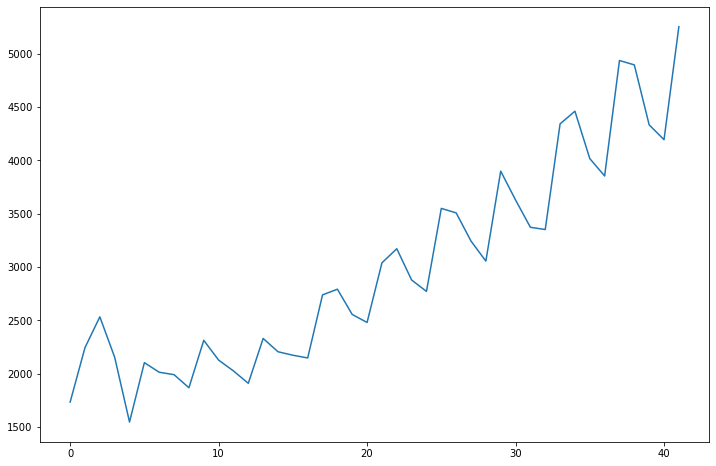

In [154]:
cocacola_data.Sales.plot()

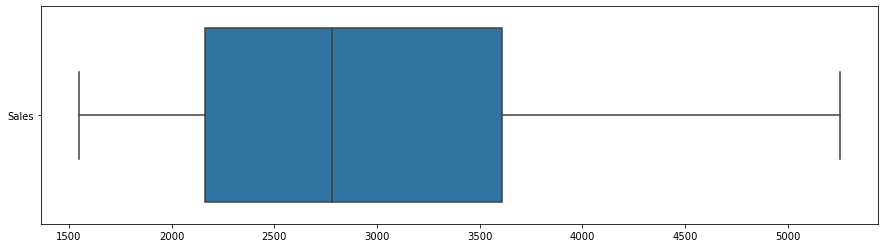

In [144]:
plt.figure(figsize=(15,4))
sns.boxplot(data=cocacola_data,orient='horizontal')
plt.show()

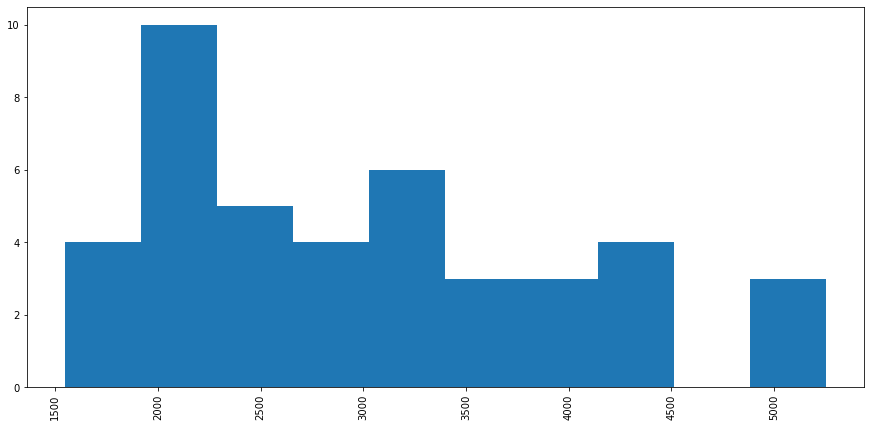

In [145]:
plt.figure(figsize=(15,7))
plt.hist(cocacola_data.Sales)
plt.xticks(rotation=90)
plt.show()



In [102]:
import numpy as np
quarter=['Q1','Q2','Q3','Q4']
n=cocacola_data['Quarter'][0]
n[0:2]

'Q1'

In [104]:
cocacola_data['quarter']=0

In [106]:
for i in range(42):
    n=cocacola_data['Quarter'][i]
    cocacola_data['quarter'][i]=n[0:2]

In [108]:
dummy=pd.DataFrame(pd.get_dummies(cocacola_data['quarter']))


In [111]:
coco=pd.concat((cocacola_data,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']


In [114]:
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [112]:
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

<AxesSubplot:>

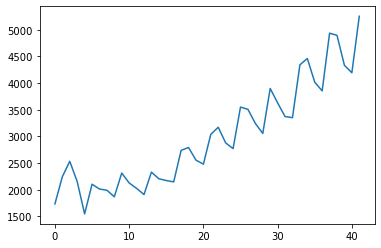

In [113]:
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()


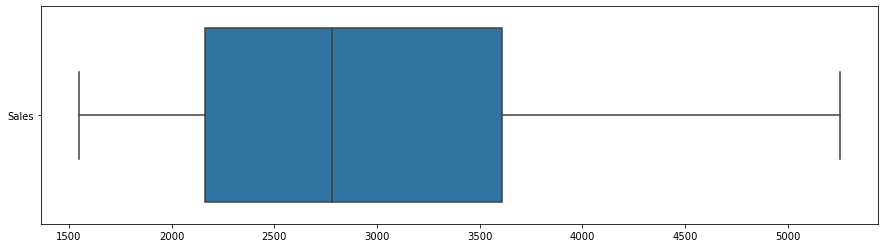

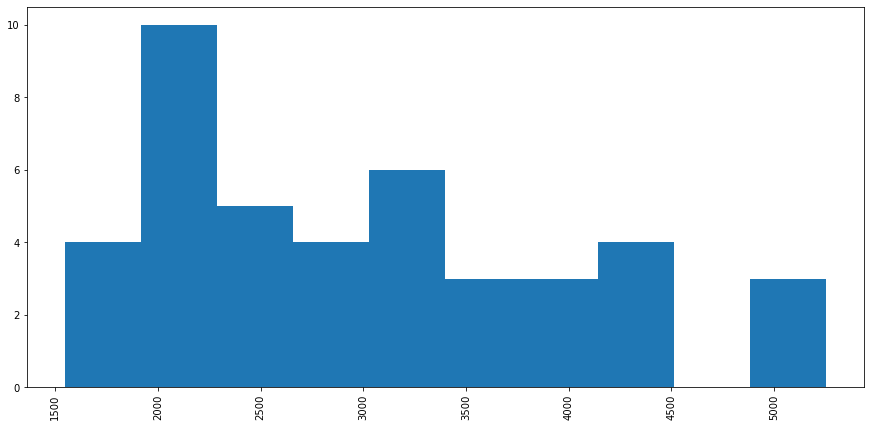

# Additive Seasonal Decomposition

<AxesSubplot:>

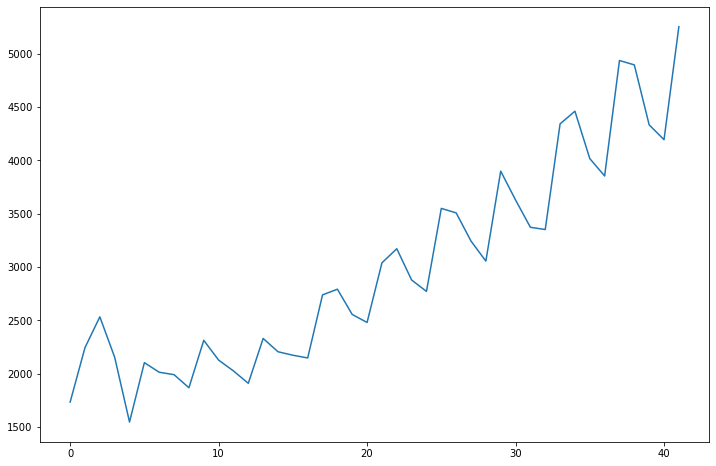

In [117]:
from pylab import rcParams
import statsmodels.api as sm 
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

In [118]:
import statsmodels.formula.api as smf


# Linear model

In [121]:

linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin


421.17878760022745

# Quadratic Model

In [122]:
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad


475.5618351831625

# Exponential model

In [124]:
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672255

# Additive seasonality

In [126]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd


1860.0238154547278

# Additive seasonality with linear trend


In [127]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear


464.98290239822626

# Additive seasonality with quadratic trend

In [129]:
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad


301.738007193485

# Multiplicative seasonality


In [130]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779745

# Multiplicative seasonality with linear trend

In [132]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin


225.52439049827746

# Multiplicative seasonality with quadratic trend

In [134]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad


581.8457187961162

# Arranging all RMSE in Data Frame 

In [138]:
data={'Model':pd.Series(['Multiplicative seasonality with quadratic trend','Additive seasonality','Additive seasonality with linear trend','rmseaddquad',
                         'Exponential model','Linear model','Multiplicative seasonality','Multiplicative seasonality with linear trend','Quadratic Model']),'RMSE':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
Rmse=pd.DataFrame(data)
Rmse


,Model,RMSE
0,Multiplicative seasonality with quadratic trend,581.845719
1,Additive seasonality,1860.023815
2,Additive seasonality with linear trend,464.982902
3,rmseaddquad,301.738007
4,Exponential model,466.247973
5,Linear model,421.178788
6,Multiplicative seasonality,1963.389640
7,Multiplicative seasonality with linear trend,225.524390
8,Quadratic Model,475.561835


## We can see we get least RMSE Value for multiplicative seasonality with linear model